# 첨도 예시

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows (맑은 고딕)
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (애플 고딕)
# plt.rcParams['font.family'] = 'NanumGothic'  # Linux (나눔고딕)

plt.rcParams['axes.unicode_minus'] = False

## 성적 데이터의 분포가 4개의 형태로 되어 있음
- 총 100개에 데이터 분포의 특징
- A반 : 0부터 1씩 증가함
- B반 : 다양한 데이터 분포
- C반 : 다양한 데이터 분포, 양극단 0, 100 하나씩 추가
- D반 : 다양한 데이터 분포, 양극단 0 개, 200 3개 

In [5]:
import pandas as pd

# CSV 파일 경로를 지정합니다.
file_path = 'datas.csv'

# pandas의 read_csv() 함수를 사용하여 CSV 파일을 읽고 DataFrame으로 만듭니다.
df = pd.read_csv(file_path, encoding="cp949", )

# 만들어진 DataFrame을 출력하여 확인합니다.
print(df)

    A반         B반   C반   D반
0    0  80.710520    0    0
1    1  38.786064   70  200
2    2  86.354185   80  200
3    3  74.712164   60  200
4    4  55.624023   50   50
..  ..        ...  ...  ...
95  95  54.634682   50   50
96  96  79.860359   80   80
97  97  28.571885   70   70
98  98  49.025352   80   80
99  99  59.911031  100  100

[100 rows x 4 columns]


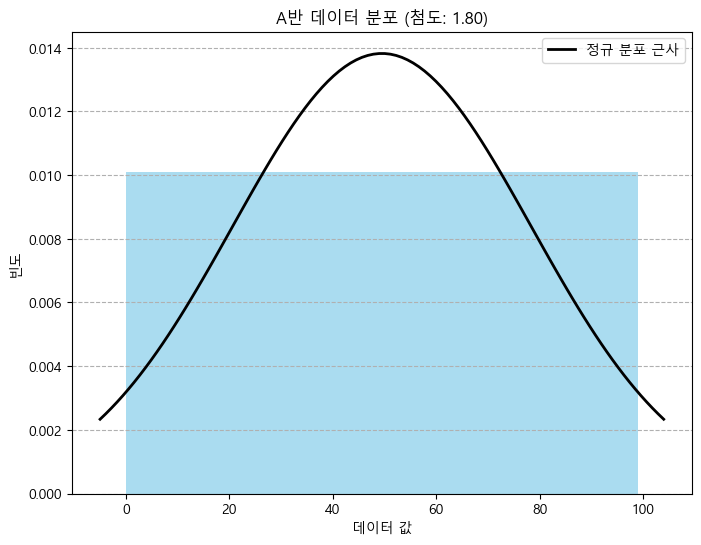

A반 첨도: 1.80


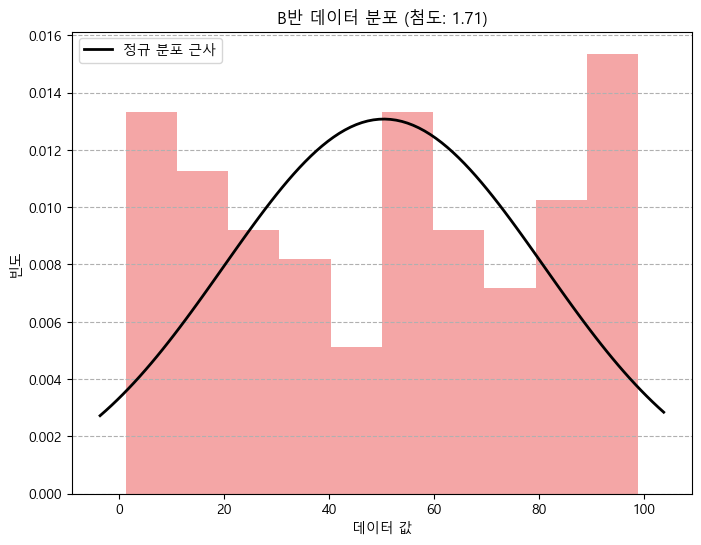

B반 첨도: 1.71


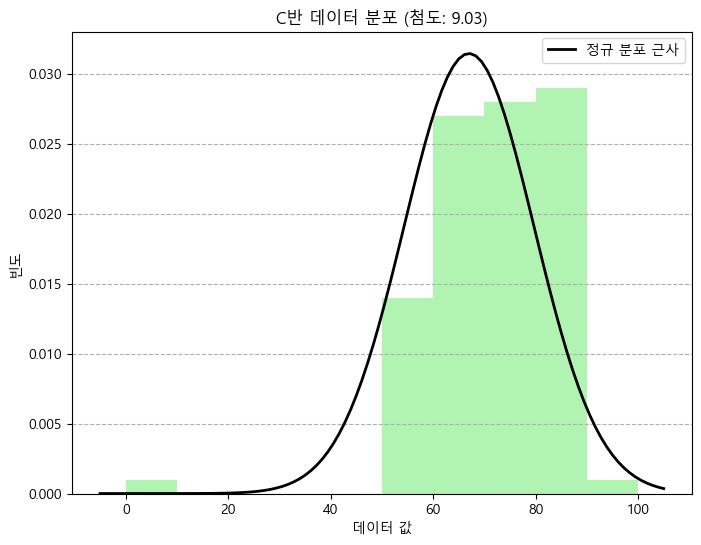

C반 첨도: 9.03


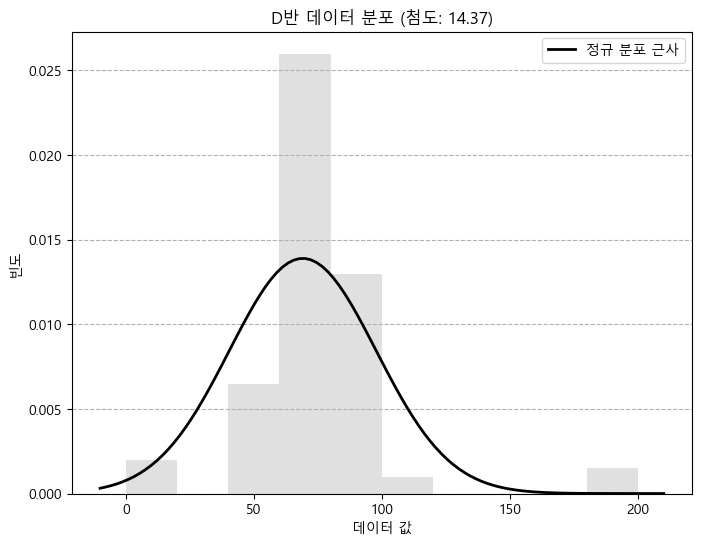

D반 첨도: 14.37


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, norm
import numpy as np


# 컬럼 이름 리스트
columns = ['A반', 'B반', 'C반', 'D반']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightgray']

# 각 컬럼에 대해 그래프 그리기
for i, col in enumerate(columns):
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, density=True, alpha=0.7, color=colors[i])

    # 정규 분포 곡선 추가 (참고용)
    mu = np.mean(df[col])
    std = np.std(df[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label='정규 분포 근사')

    kurt_val = kurtosis(df[col], fisher=False)
    plt.title(f'{col} 데이터 분포 (첨도: {kurt_val:.2f})')
    plt.xlabel('데이터 값')
    plt.ylabel('빈도')
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()

    print(f'{col} 첨도: {kurt_val:.2f}')